In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Cargar y filtrar datos para EDA en varones
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/MODELOS MONOGRAFIA/otrasinfeccionesMonografia.csv", sep=";")
data_eda_varones = data[data['tipo'] == 'EDA'][['fecha', 'varones']]
data_eda_varones['fecha'] = pd.to_datetime(data_eda_varones['fecha'], dayfirst=True)
data_eda_varones = data_eda_varones.sort_values(by='fecha')
data_eda_varones.set_index('fecha', inplace=True)

# Prueba de Dickey-Fuller para verificar estacionaridad
result_varones = adfuller(data_eda_varones['varones'])
print('Prueba de Dickey-Fuller para Varones:')
print(f'Estadístico de prueba: {result_varones[0]:.4f}')
print(f'P-valor: {result_varones[1]:.4f}')
for key, value in result_varones[4].items():
    print(f'Valor Crítico {key}: {value:.4f}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Prueba de Dickey-Fuller para Varones:
Estadístico de prueba: -2.6490
P-valor: 0.0833
Valor Crítico 1%: -3.4532
Valor Crítico 5%: -2.8716
Valor Crítico 10%: -2.5721


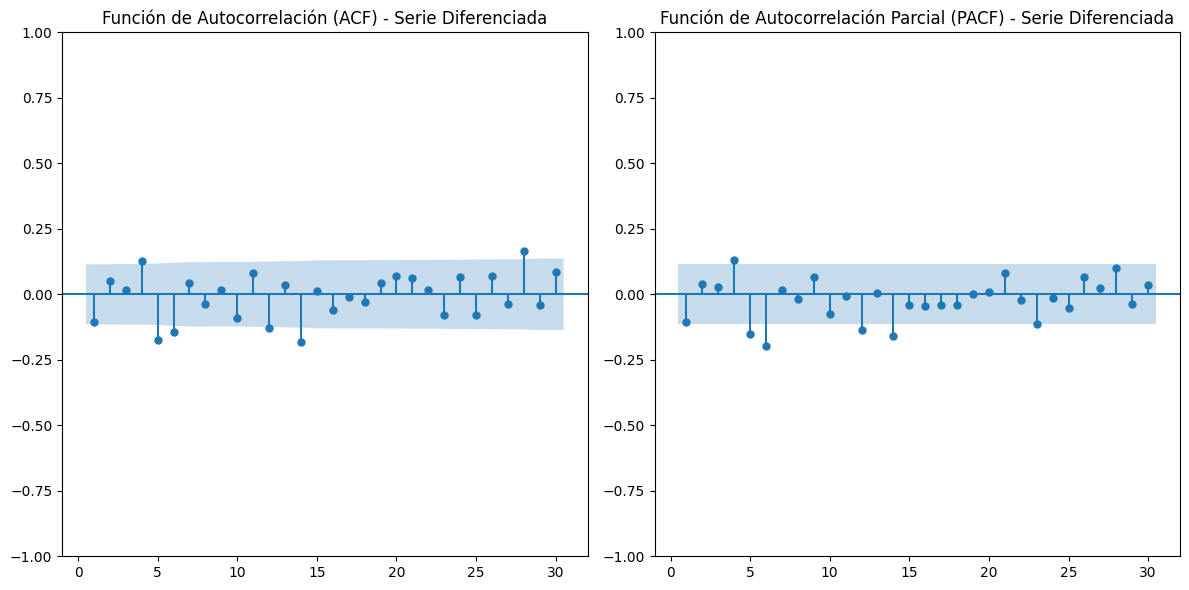

In [ ]:


# Diferenciar la serie para hacerla estacionaria
data_eda_varones_diff = data_eda_varones['varones'].diff().dropna()

# Graficar ACF y PACF de la serie diferenciada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(data_eda_varones_diff, lags=30, zero=False, ax=plt.gca())
plt.title("Función de Autocorrelación (ACF) - Serie Diferenciada")

plt.subplot(1, 2, 2)
plot_pacf(data_eda_varones_diff, lags=30, zero=False, ax=plt.gca())
plt.title("Función de Autocorrelación Parcial (PACF) - Serie Diferenciada")

plt.tight_layout()
plt.show()

# ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                varones   No. Observations:                  251
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1366.540
Date:                Mon, 02 Dec 2024   AIC                           2741.080
Time:                        01:37:39   BIC                           2755.182
Sample:                    01-07-2019   HQIC                          2746.755
                         - 10-23-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        447.1530     54.327      8.231      0.000     340.674     553.632
ar.L1          0.9332      0.027     34.333      0.000       0.880       0.987
ma.L1         -0.0333      0.055     -0.610      0.5

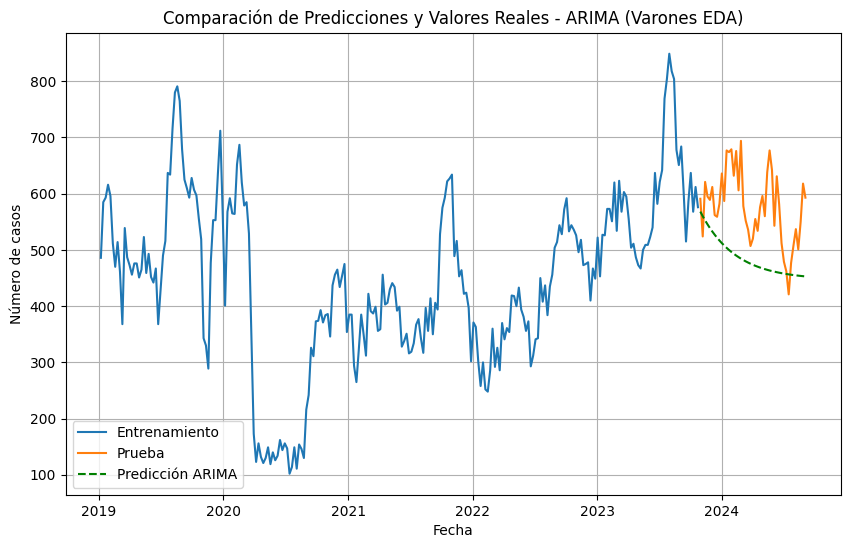

MAE: 94.88
RMSE: 110.73
MAPE: 15.71%
sMAPE: 17.46%


In [ ]:


# Dividir la serie en entrenamiento y prueba (85% entrenamiento, 15% prueba)
train_size_varones = int(len(data_eda_varones) * 0.85)
train_varones, test_varones = data_eda_varones['varones'][:train_size_varones], data_eda_varones['varones'][train_size_varones:]

# Entrenar el modelo ARIMA
model_arima_varones = ARIMA(train_varones, order=(1, 0, 1))
arima_result_varones = model_arima_varones.fit()

# Mostrar el resumen del modelo
print(arima_result_varones.summary())

# Generar predicciones en el conjunto de prueba
predictions_arima_varones = arima_result_varones.forecast(steps=len(test_varones))

# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.plot(train_varones.index, train_varones, label="Entrenamiento")
plt.plot(test_varones.index, test_varones, label="Prueba")
plt.plot(test_varones.index, predictions_arima_varones, color='green', linestyle='--', label="Predicción ARIMA")
plt.title("Comparación de Predicciones y Valores Reales - ARIMA (Varones EDA)")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.legend()
plt.grid(True)
plt.show()

# Calcular métricas de evaluación: MAE, RMSE, MAPE y sMAPE
mae_varones = mean_absolute_error(test_varones, predictions_arima_varones)
rmse_varones = np.sqrt(mean_squared_error(test_varones, predictions_arima_varones))
mape_varones = mean_absolute_percentage_error(test_varones, predictions_arima_varones) * 100  # Convertir a porcentaje
smape_varones = 100 * np.mean(2 * np.abs(test_varones - predictions_arima_varones) / (np.abs(test_varones) + np.abs(predictions_arima_varones)))

# Imprimir métricas
print(f'MAE: {mae_varones:.2f}')
print(f'RMSE: {rmse_varones:.2f}')
print(f'MAPE: {mape_varones:.2f}%')
print(f'sMAPE: {smape_varones:.2f}%')

# SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            varones   No. Observations:                  251
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -1229.118
Date:                            Mon, 02 Dec 2024   AIC                           2468.237
Time:                                    01:37:51   BIC                           2485.205
Sample:                                01-07-2019   HQIC                          2475.089
                                     - 10-23-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9217      0.054     16.917      0.000       0.815       1.028
ma.L1         -0.9788      0.048   

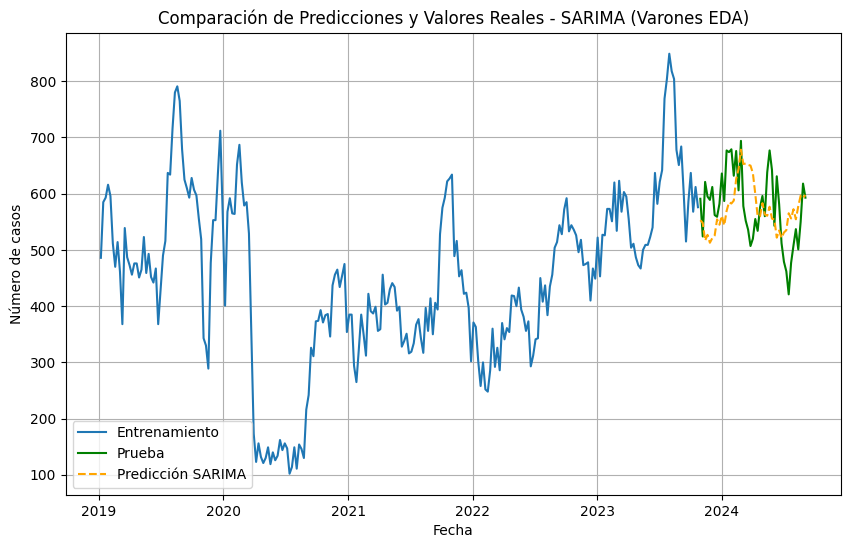

MAE: 60.37
RMSE: 71.37
MAPE: 10.66%
sMAPE: 10.52%


In [ ]:


# Configuración del modelo SARIMA: (p, d, q) x (P, D, Q, s)
# Usaremos los valores (1, 1, 1) para (p, d, q) y probaremos con estacionalidad (P=1, D=1, Q=1, s=52)
model_sarima_varones = SARIMAX(train_varones, order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
sarima_result_varones = model_sarima_varones.fit()

# Mostrar el resumen del modelo SARIMA
print(sarima_result_varones.summary())

# Generar predicciones en el conjunto de prueba
predictions_sarima_varones = sarima_result_varones.forecast(steps=len(test_varones))

# Graficar predicciones SARIMA vs valores reales
plt.figure(figsize=(10, 6))
plt.plot(train_varones.index, train_varones, label="Entrenamiento")
plt.plot(test_varones.index, test_varones, label="Prueba", color='green')
plt.plot(test_varones.index, predictions_sarima_varones, color='orange', linestyle='--', label="Predicción SARIMA")
plt.title("Comparación de Predicciones y Valores Reales - SARIMA (Varones EDA)")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.legend()
plt.grid(True)
plt.show()

# Calcular métricas de evaluación: MAE, RMSE, MAPE y sMAPE
mae_sarima_varones = mean_absolute_error(test_varones, predictions_sarima_varones)
rmse_sarima_varones = np.sqrt(mean_squared_error(test_varones, predictions_sarima_varones))
mape_sarima_varones = mean_absolute_percentage_error(test_varones, predictions_sarima_varones) * 100  # Convertir a porcentaje
smape_sarima_varones = 100 * np.mean(2 * np.abs(test_varones - predictions_sarima_varones) / (np.abs(test_varones) + np.abs(predictions_sarima_varones)))

# Imprimir métricas
print(f'MAE: {mae_sarima_varones:.2f}')
print(f'RMSE: {rmse_sarima_varones:.2f}')
print(f'MAPE: {mape_sarima_varones:.2f}%')
print(f'sMAPE: {smape_sarima_varones:.2f}%')

In [ ]:
# Crear DataFrame comparativo de los valores reales y predichos para SARIMA
comparison_df_varones = pd.DataFrame({
    'Fecha': test_varones.index,
    'Reales': test_varones,
    'Predicciones SARIMA': round(predictions_sarima_varones)
})

# Mostrar el DataFrame comparativo
print(comparison_df_varones)

                Fecha  Reales  Predicciones SARIMA
2023-10-30 2023-10-30     591                553.0
2023-11-06 2023-11-06     524                548.0
2023-11-13 2023-11-13     621                517.0
2023-11-20 2023-11-20     595                527.0
2023-11-27 2023-11-27     589                513.0
2023-12-04 2023-12-04     612                521.0
2023-12-11 2023-12-11     562                526.0
2023-12-18 2023-12-18     559                554.0
2023-12-25 2023-12-25     582                545.0
2024-01-01 2024-01-01     636                561.0
2024-01-08 2024-01-08     587                544.0
2024-01-15 2024-01-15     677                569.0
2024-01-22 2024-01-22     674                585.0
2024-01-29 2024-01-29     679                583.0
2024-02-05 2024-02-05     632                588.0
2024-02-12 2024-02-12     676                626.0
2024-02-19 2024-02-19     606                644.0
2024-02-26 2024-02-26     694                678.0
2024-03-04 2024-03-04     578  

In [ ]:
# prompt: realiza 8 predicciones a futuro

# Generar 8 predicciones a futuro usando el modelo SARIMA ya entrenado
future_steps = 8
future_predictions_varones = sarima_result_varones.get_forecast(steps=future_steps)

# Obtener las predicciones y los intervalos de confianza
future_mean = future_predictions_varones.predicted_mean
future_conf_int = future_predictions_varones.conf_int()

# Crear un índice de fechas para las predicciones futuras
future_index = pd.date_range(start=data_eda_varones.index[-1] + pd.DateOffset(1), periods=future_steps, freq='W')

# Crear un DataFrame para las predicciones futuras
# Access confidence intervals using column names instead of numerical indices
future_df_varones = pd.DataFrame({
    'Fecha': future_index,
    'Predicciones SARIMA': future_mean.round(),
    'Límite Inferior': future_conf_int['lower varones'].round(),  # Access using column name
    'Límite Superior': future_conf_int['upper varones'].round()   # Access using column name
})

# Mostrar las predicciones futuras
future_df_varones

,Fecha,Predicciones SARIMA,Límite Inferior,Límite Superior
2023-10-30,2024-09-08,553.0,436.0,670.0
2023-11-06,2024-09-15,548.0,387.0,709.0
2023-11-13,2024-09-22,517.0,324.0,709.0
2023-11-20,2024-09-29,527.0,310.0,743.0
2023-11-27,2024-10-06,513.0,277.0,749.0
2023-12-04,2024-10-13,521.0,269.0,773.0
2023-12-11,2024-10-20,526.0,260.0,792.0
2023-12-18,2024-10-27,554.0,276.0,833.0


In [ ]:

# Valores reales a futuro
real_values = [617, 687, 666, 629, 580, 517, 523, 498]

# Obtener las predicciones del modelo desde el DataFrame future_df
# Asumiendo que 'future_df' existe en el contexto de ejecución del código anterior.
# Ajusta esto según el nombre real de tu DataFrame y la columna de predicciones

# Asegúrate de que future_df esté definido
try:
    future_predictions = future_df_varones['Predicciones SARIMA'].values
except NameError:
    print("Error: 'future_df' no está definida. Asegúrate de que el código que genera el DataFrame future_df se haya ejecutado correctamente.")
    future_predictions = [0] * len(real_values) #valor por defecto para prevenir error

#Evaluar solo los 8 primeros valores predichos, descartar el noveno
future_predictions = future_predictions[:8]


# Calcular métricas de evaluación
mae = np.mean(np.abs(real_values[:8] - future_predictions))
rmse = np.sqrt(np.mean((real_values[:8] - future_predictions)**2))
mape = np.mean(np.abs((real_values[:8] - future_predictions) / real_values[:8])) * 100
smape = 100 * np.mean(2 * np.abs(real_values[:8] - future_predictions) / (np.abs(real_values[:8]) + np.abs(future_predictions)))


# Crear un DataFrame para comparar
comparison_df = pd.DataFrame({
    'Real': real_values[:8],
    'Predicción': future_predictions
})

print(comparison_df)
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'sMAPE: {smape:.2f}%')

   Real  Predicción
0   617       553.0
1   687       548.0
2   666       517.0
3   629       527.0
4   580       513.0
5   517       521.0
6   523       526.0
7   498       554.0
MAE: 73.00
RMSE: 89.21
MAPE: 11.67%
sMAPE: 12.57%


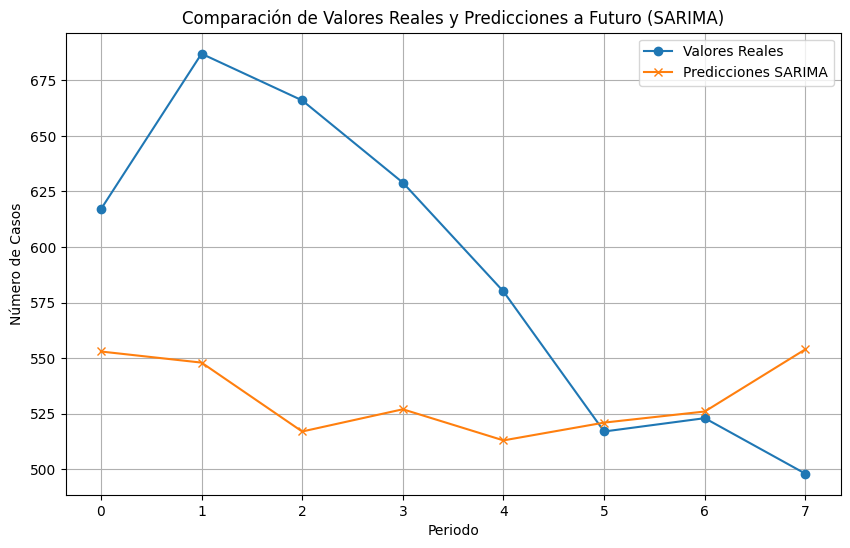

In [ ]:
# prompt: grafica la comparacion

# Gráfica de comparación entre valores reales y predicciones a futuro
plt.figure(figsize=(10, 6))
plt.plot(range(len(real_values[:8])), real_values[:8], label="Valores Reales", marker='o')
plt.plot(range(len(future_predictions)), future_predictions, label="Predicciones SARIMA", marker='x')
plt.title("Comparación de Valores Reales y Predicciones a Futuro (SARIMA)")
plt.xlabel("Periodo")
plt.ylabel("Número de Casos")
plt.legend()
plt.grid(True)
plt.show()